## Differential Equations: Computational practicum
Author: Vyacheslav Shults, BS17-8

In [ ]:
# setup the plotly graphics library and configure it to show 
# figures inline in the notebook
import plotly.offline as offline
import plotly.graph_objs as go

offline.init_notebook_mode()

import numpy as np
from math import e

import warnings
warnings.filterwarnings('ignore')

In [1]:
# Run only this cell for displaying interactive precalcutated graphs
# Static graps available by default
from IPython.display import HTML, Image, display, Math, Latex

In [2]:
# Create dirrectory for user interactive graphs
import os
if not ('graphs' in os.listdir()):
    os.mkdir('graphs')

# Introduction

The goal of this practicum is to solve Initial value problem (IVP) with an interesting interval using numerical methods such that Euler's method, improved Euler’s method and Runge-Kutta method.

$$ 
\left\{\begin{matrix}
y'=f(x, y)\\ 
y(x_{0})=y_{0}\\
x\in [x_{0}, X]\\
\end{matrix}\right.
$$

In Variant 5 we have $ f(x, y) = \cos\left(x\right)-y$,  $x_{0}=1, \,y_{0}=1,\, X=9.5$

## Exact solution
#### $ y' = \cos\left(x\right)-y$
This equation has exact solution $y=ce^{-x}+\frac{1}{2}\sin(x)+\frac{1}{2}\cos(x)$

According to the initial value constant $c=e^{x_{0}}\left(y_{0}-\frac{\sin(x_{0})+\cos(x_{0})}{2}\right)$ 

Solution is $y=\frac{1}{2}\left(2y_{0}-\sin(x_{0})-\cos(x_{0})\right)e^{x_{0}-x}+\frac{1}{2}\sin(x)+\frac{1}{2}\cos(x)$

Because the error values of the algorithms differ by orders of magnitude, the error graphs will be represented as a $\log10$ of the error value from $x$.

Github does not support these graphs. You can see interactive versions of this graphs in $graphs$ directory. Or download this notebook, uncomment appropriate lines and launch notebook.

In [ ]:
# Define function f(x, y)
f = lambda x, y: np.cos(x)-y

# Define x0, y0, X
x0 = 1
y0 = 1
X = 9.5

# Define number of steps
n_steps = 100

# Define exact solution
f_e = lambda x, x0=x0, y0=y0: (y0-(np.sin(x0)+np.cos(x0))/2)*e**(x0-x)+(np.sin(x)+np.cos(x))/2

## Euler's method

In [ ]:
def euler(fun, x0, y0, X, n_steps, print_res=False):
    x = x0
    y = y0
    
    h = (X - x)/n_steps
    res = []
    
    for i in np.arange(n_steps):
        res.append((i, x, y))
        y += fun(x, y)*h
        x += h
        if print_res: 
            print("n: {:<4} x: {:<12g} y: {:<12g}".format(*res[-1]))
    return np.array(res)

## Improved Euler's method

In [ ]:
def imroved_euler(fun, x0, y0, X, n_steps, print_res=False):
    x = x0
    y = y0
    
    h = (X - x)/n_steps
    res = []
    
    for i in np.arange(n_steps):
        res.append((i, x, y))
        y_h = y + fun(x, y)*h
        y = y + (fun(x, y)+fun(x+h, y_h))*h/2
        x = x + h
        if print_res: 
            print("n: {:<4} x: {:<12g} y: {:<12g}".format(*res[-1]))
    return np.array(res)

## Runge–Kutta method

In [ ]:
def runge_kutta(fun, x0, y0, X, n_steps, print_res=False):
    x = x0
    y = y0
    
    h = (X - x)/n_steps
    res = []
    
    for i in np.arange(n_steps):
        res.append((i, x, y))
        k1 = h*fun(x, y)
        k2 = h*fun(x + h/2, y + k1/2)
        k3 = h*fun(x + h/2, y + k2/2)
        k4 = h*fun(x + h, y + k3)
        y = y + (k1 + 2*k2 + 2*k3+ k4)/6
        x = x + h
        if print_res: 
            print("n: {:<4} x: {:<12g} y: {:<12g}".format(*res[-1]))
    return np.array(res)

In [ ]:
res1 =         euler(f, x0, y0, X, n_steps)
res2 = imroved_euler(f, x0, y0, X, n_steps)
res3 =   runge_kutta(f, x0, y0, X, n_steps)

In [ ]:
def get_figure(title, scatter_data, xaxis_label="X axis", yaxis_label="Y axis"):
    data = [
        go.Scatter(
        name=scatter[0],
        x=scatter[1],
        y=scatter[2],
        xaxis='x',
        yaxis='y', 
        ) for scatter in scatter_data
    ]
    layout = go.Layout(title=title,
                       xaxis=dict(title=xaxis_label),
                       yaxis=dict(title=yaxis_label))
    fig = go.Figure(data=data, layout=layout)
    return fig

In [ ]:
scatter_data = [
    ["Exact solution", res1[:,1], f_e(res1[:,1])],
    ["Euler method", res1[:,1], res1[:,2]],
    ["Improved Euler method", res2[:,1], res2[:,2]],
    ["Runge–Kutta method", res3[:,1], res3[:,2]],
]
fig1 = get_figure("Solutions of ODE", scatter_data)

offline.plot(fig1, filename="graphs/result_numerical", auto_open=False)

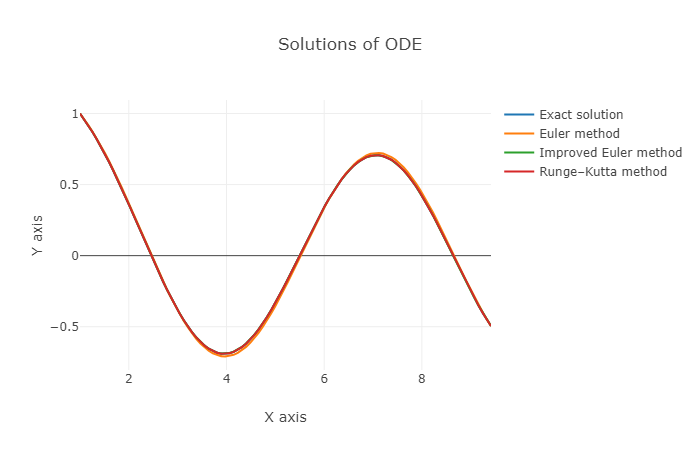

In [3]:
# display(HTML("graphs/result_numerical.html")) # uncomment this line to show interactive graphs
display(Image("images/result_numerical.png")) # uncomment this line to show static graphs

In [ ]:
scatter_data = [
    ["Euler method", res1[:,1], np.log10(np.abs(res1[:,2]-f_e(res1[:,1])))],
    ["Improved Euler method", res2[:,1], np.log10(np.abs(res2[:,2]-f_e(res1[:,1])))],
    ["Runge–Kutta method", res3[:,1], np.log10(np.abs(res3[:,2]-f_e(res3[:,1])))],
]
fig2 = get_figure("Comparison of Logarithm of local truncation errors", 
                  scatter_data, yaxis_label="Log10 error")

offline.plot(fig2, filename="graphs/comparison_of_ltr", auto_open=False)

A significant drop in the error value is due to the non-monotonicity of the function

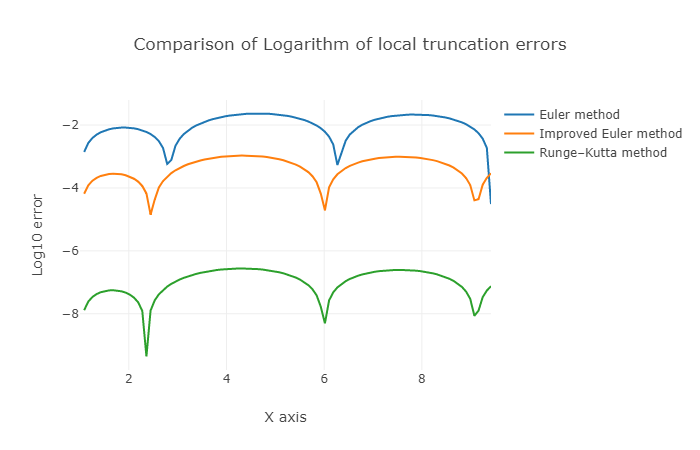

In [4]:
# display(HTML("graphs/comparison_of_ltr.html")) # uncomment this line to show interactive graphs
display(Image("images/comparison_of_ltr.png")) # uncomment this line to show static graphs

## Bothside Euler's method

In [ ]:
def bs_euler(fun, x0, y0, X_start, X_end, n_steps):
    if not (X_start <= x0 <= X_end):
        return np.array([])
    x = x0
    y = y0
    
    h = (X_end - X_start)/n_steps
    res = []
    left_part = np.arange(x0, X_start, -h)
    right_part = np.arange(x0, X_end, h) 
            
    for x in left_part:
        res.append((x, y))
        y -= fun(x, y)*h
        
    res.reverse()
    res.pop(-1)
    y = y0
            
    for x in right_part:
        res.append((x, y))
        y += fun(x, y)*h
    
    
    return np.array(res)

## Bothside Improved Euler's method

In [ ]:
def bs_imroved_euler(fun, x0, y0, X_start, X_end, n_steps):
    if not (X_start <= x0 <= X_end):
        return np.array([])
    x = x0
    y = y0
    
    h = (X_end - X_start)/n_steps
    res = []
    left_part = np.arange(x0, X_start, -h)
    right_part = np.arange(x0, X_end, h)
    
    for x in left_part:
        res.append((x, y))
        y_h = y - fun(x, y)*h
        y = y - (fun(x, y)+fun(x-h, y_h))*h/2
        
    res.reverse()
    res.pop(-1)
    y = y0
            
    for x in right_part:
        res.append((x, y))
        y_h = y + fun(x, y)*h
        y = y + (fun(x, y)+fun(x+h, y_h))*h/2
    
    return np.array(res)

## Bothside Runge–Kutta method

In [ ]:
def bs_runge_kutta(fun, x0, y0, X_start, X_end, n_steps):
    if not (X_start <= x0 <= X_end):
        return np.array([])
    x = x0
    y = y0
    
    h = (X_end - X_start)/n_steps
    res = []
    left_part = np.arange(x0, X_start, -h)
    right_part = np.arange(x0, X_end, h)
    
    for x in left_part:
        res.append((x, y))
        k1 = -h*fun(x, y)
        k2 = -h*fun(x - h/2, y + k1/2)
        k3 = -h*fun(x - h/2, y + k2/2)
        k4 = -h*fun(x - h, y + k3)
        y = y + (k1 + 2*k2 + 2*k3 + k4)/6  
        
    res.reverse()
    res.pop(-1)
    y = y0
    
    for x in right_part:
        res.append((x, y))
        k1 = h*fun(x, y)
        k2 = h*fun(x + h/2, y + k1/2)
        k3 = h*fun(x + h/2, y + k2/2)
        k4 = h*fun(x + h, y + k3)
        y = y + (k1 + 2*k2 + 2*k3+ k4)/6
    
    return np.array(res)

In [ ]:
x_start = -4
x_end = 20
beu = bs_euler(f, x0, y0, x_start, x_end, n_steps*2)
bie = bs_imroved_euler(f, x0, y0, x_start, x_end, n_steps*2)
brk = bs_runge_kutta(f, x0, y0, x_start, x_end, n_steps*2)

In [ ]:
scatter_data = [
    ["Exact solution", beu[:,0], f_e(beu[:,0])],
    ["Bothside Euler method", beu[:,0], beu[:,1]],
    ["Bothside Improved Euler method", bie[:,0], bie[:,1]],
    ["Bothside Runge–Kutta method", brk[:,0], brk[:,1]],
]
fig3 = get_figure("Solutions of ODE", scatter_data)

offline.plot(fig3, filename="graphs/result_bs_numerical", auto_open=False)

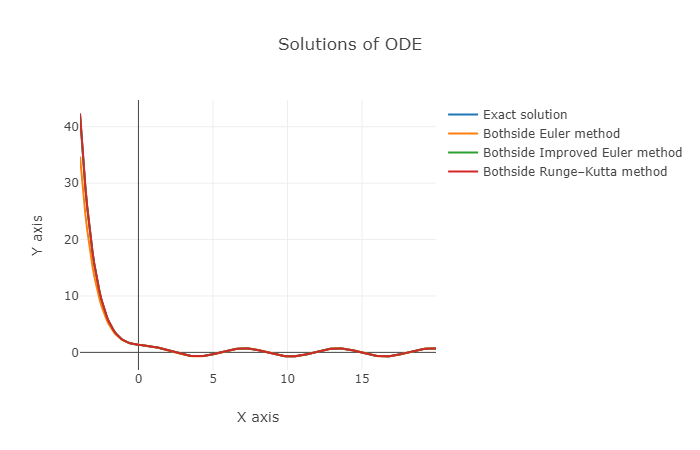

In [5]:
# display(HTML("graphs/result_bs_numerical.html")) # uncomment this line to show interactive graphs
display(Image("images/result_bs_numerical.png")) # uncomment this line to show static graphs

In [ ]:
scatter_data = [
    ["Bothside Euler method", beu[:,0], np.log10(np.abs(beu[:,1]-f_e(beu[:,0])))],
    ["Bothside Improved Euler method", bie[:,0], np.log10(np.abs(bie[:,1]-f_e(bie[:,0])))],
    ["Bothside Runge–Kutta method", brk[:,0], np.log10(np.abs(brk[:,1]-f_e(brk[:,0])))],
]
fig4 = get_figure("Comparison of Logarithm of local truncation errors", 
                  scatter_data, yaxis_label="Log10 error")

offline.plot(fig4, filename="graphs/comparison_of_ltr_bs", auto_open=False)

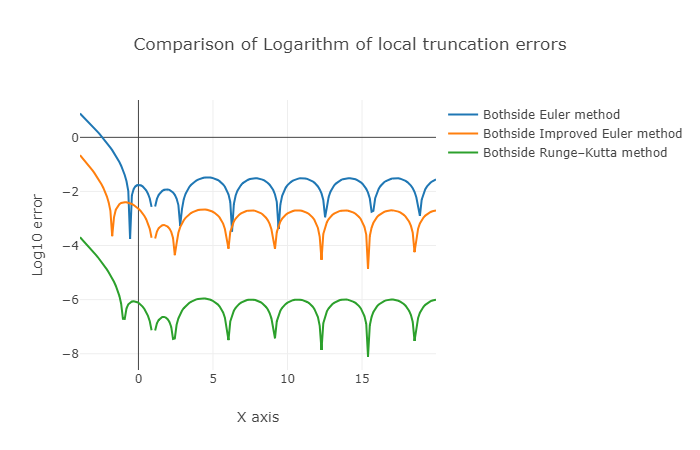

In [6]:
# display(HTML("graphs/comparison_of_ltr_bs.html")) # uncomment this line to show interactive graphs
display(Image("images/comparison_of_ltr_bs.png")) # uncomment this line to show static graphs

In [ ]:
def get_mean_error(f, x0, y0, X, n_steps, mode):
    algos = [euler, imroved_euler, runge_kutta]
    i, x, y = algos[mode](f, x0, y0, X, n_steps).T
    mean_error = np.abs(f_e(x)-y).mean()
    return np.log10(mean_error)

list_of_steps = np.arange(20, 1000, 20)
eu_gte = [get_mean_error(f, x0, y0, X, n_steps, 0) for n_steps in list_of_steps]
ie_gte = [get_mean_error(f, x0, y0, X, n_steps, 1) for n_steps in list_of_steps]
rk_gte = [get_mean_error(f, x0, y0, X, n_steps, 2) for n_steps in list_of_steps]   

scatter_data = [
    ["GTE Euler method", list_of_steps, eu_gte],
    ["GTE Improved Euler method", list_of_steps, ie_gte],
    ["GTE Runge–Kutta method", list_of_steps, rk_gte],
]
fig5 = get_figure("Comparison of log10 from global truncation errors", scatter_data, 
           xaxis_label="Number of steps", yaxis_label="Mean error")

offline.plot(fig5, filename="graphs/comparison_of_gtr", auto_open=False)

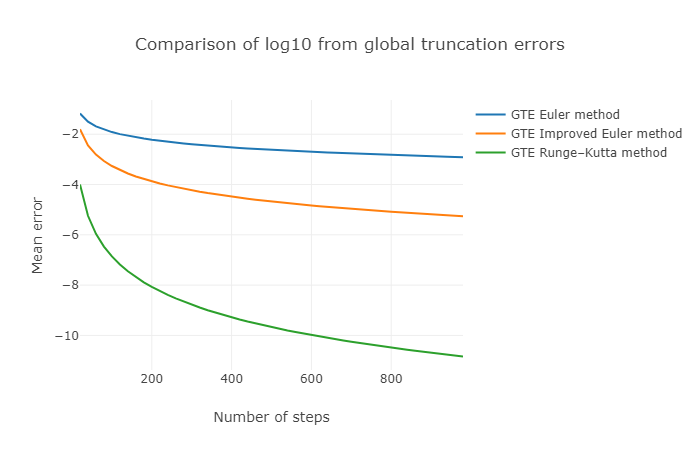

In [7]:
# display(HTML("graphs/comparison_of_gtr.html")) # uncomment this line to show interactive graphs
display(Image("images/comparison_of_gtr.png")) # uncomment this line to show static graphs